# Final Project

The final class project is located on github at

https://classroom.github.com/a/qP9GMlhd

Deadline is Wednesday, December 5 at 2pm.

Please submit your work as jupyter notebook (or possibly multiple jupyter notebooks) via github classroom. It is permissible to discuss your project with other students but your submitted work has to be your own. All modeling work should be accompanied by text describing and explaining the work and suitable figures.

Only if you have problem with the github classrom submission is it permissible to submit via email. Please explain the difficulties you experienced with github classroom, so they can be avoided in the future.

## Predicting superconducting transition temperatures from material database.

### Background

We will use materials data for superconducting materials to create machine learning models to predict the superconducting transition temperature of superconducting materials. We will not try to predict the potential of a material to be a superconductor, as this is a question that far exceeds the scope of this final class project.

Your project should use as a guide the relevant sections of the paper 
**Machine learning modeling of superconducting critical temperature**
by Stanev et al.

* published: https://www.sciencedirect.com/science/article/pii/S0927025618304877
* arXiv: https://arxiv.org/abs/1709.02727

However, to simplify data collection, we will use the dataset described in the paper
**A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor**
by Kam Hamidieh 

* arXiv https://arxiv.org/abs/1803.10260
* github https://github.com/khamidieh/predict_tc/blob/master/paper_3.pdf

The dataset is available in the github project: https://github.com/khamidieh/predict_tc
This dataset is based in part on the same sources as the Stanev paper but in its final form differs considerably in the choice of variables from the data used in the Stanev paper. Hence you should not expect identical results.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math


### Part 1 - Extract the dataset 
The Hamidieh dataset can be downloaded as part of a github project provided by the author: https://github.com/khamidieh/predict_tc .
However the dataset is in a binary format that is not directly accessible from python. Follow the instructions in the github project to extract datafiles that can be imported into python. All software necessary software is available on the computers in Weniger 412.


#### I extracted the data in R, and saved the elemental data as element_data.csv and the materials data as unique_m.csv.

"avg_element_data.csv" containes the weighted averaged characteristic values (from element_data.csv) for each material. Average values are calculated by multiplying the characteristic value (e.g. atomic radius) for each element by the proportion of that element in the material, then adding up all of those products. First column ('Material') contains the material index number. The remaining columns are the averaged values for each characteristic in the element_data.csv file.

In [58]:
elem_data = pd.read_csv('avg_element_data.csv')
unique_data = pd.read_csv('unique_m.csv')

elem_x = elem_data.columns[1:]
elem_y = elem_data.columns[0]
elem_names = elem_data.columns[0]

#material data
unique_x = unique_data.columns[1:-2]
unique_y = unique_data.columns[-2]
material_names = unique_data.columns[-1]

# Left off Here... Creat HTC dataset

In [73]:

# low temperature dataset
lowt_data = unique_data.loc[unique_data[unique_y] < 10]

# Fe dataset
fe_data = unique_data.loc[unique_data['Fe'] >0]

# High Temperature Dataset
htc_data = unique_data.loc[unique_data[unique_y] > 30]

### HTC dataset with Cu and O.
htc_data = unique_data.loc[unique_data['Cu'] > 0].loc[unique_data['O'] >0]

### HTC dataset with Cu and O with roughly 1:2 ratio
htcr_data = unique_data.loc[unique_data['Cu']/unique_data['O'] > .4].loc[unique_data['Cu']/unique_data['O'] < .6]


### Part 2 - Visualization and exploration of the data

Explore and visualize the dataset. Answer  questions like:How many variables? How many entries? Which elements appear how often? Use the figures in the papers as a guide. At the minimum provide figures of super conducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

* $T_c<10K$. 
* Iron based super conductors, i.e. material composition contains $Fe$.
* HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly a $1:2$ ration. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context.




In [66]:
print('# of variables in material dataset: ', len(unique_x))
print('# of variables in element dataset: ', len(elem_x))

print('Total # of variables: ', len(elem_x)+len(unique_x))

print('\n Number of Superconducting Materials: ', len(unique_data[unique_y]))

# of variables in material dataset:  86
# of variables in element dataset:  36
Total # of variables:  122

 Number of Superconducting Materials:  21263


In [36]:
def vis_data(data, titles):    
    plt.figure(figsize=(8,6))
    plt.xlabel('Critical Temp', fontsize = 16)
    plt.ylabel('# Materials', fontsize = 16)
    plt.title(titles[0], fontsize = 20)
    txt = plt.hist(data['critical_temp'], bins=100)

    elem_counts = []
    for elem in unique_x:
        elem_counts.append(np.count_nonzero(unique_data[elem]))


    plt.figure(figsize=(8,20))
    plt.barh(np.arange(0,len(unique_x)),width=elem_counts)
    plt.yticks(np.arange(0,len(unique_x)),unique_x)
    txt = plt.title(titles[1], fontsize=20)

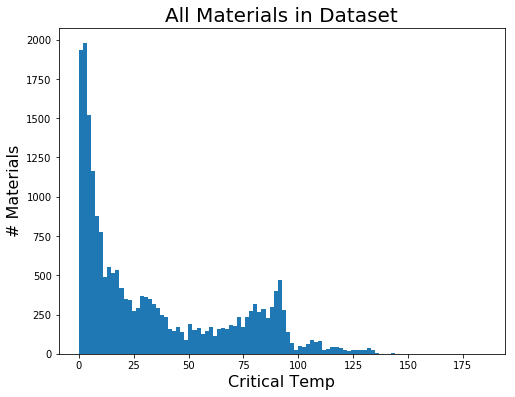

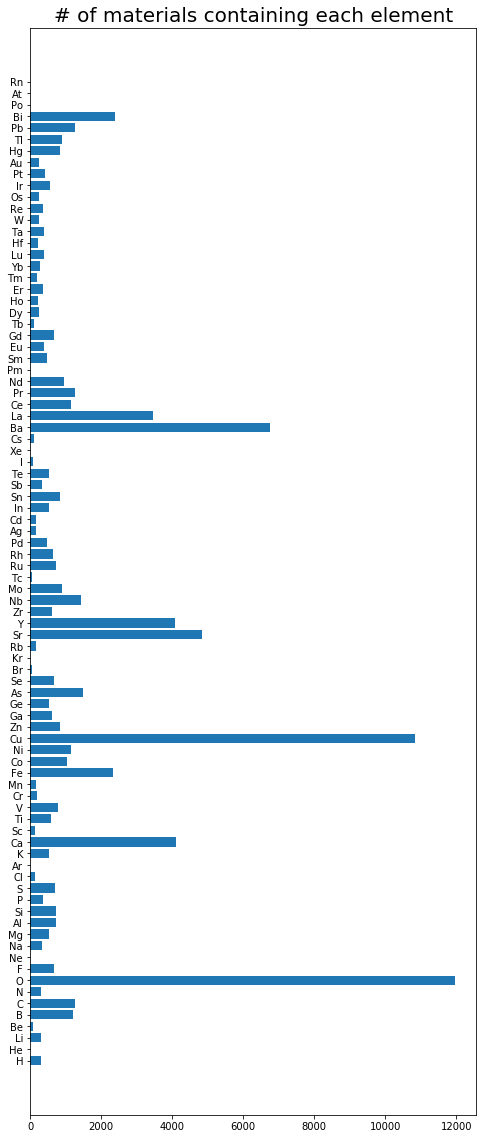

In [37]:
vis_data(unique_data,('All Materials in Dataset','# of materials containing each element'))

### $T_c<10K$. 

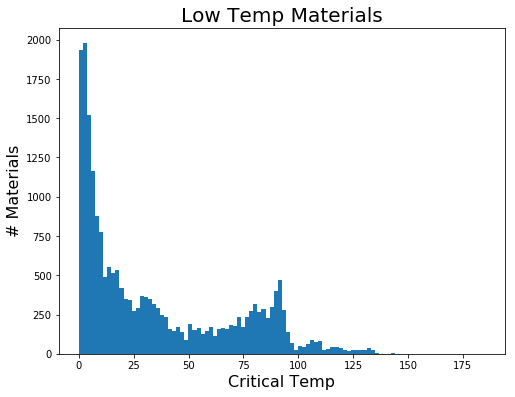

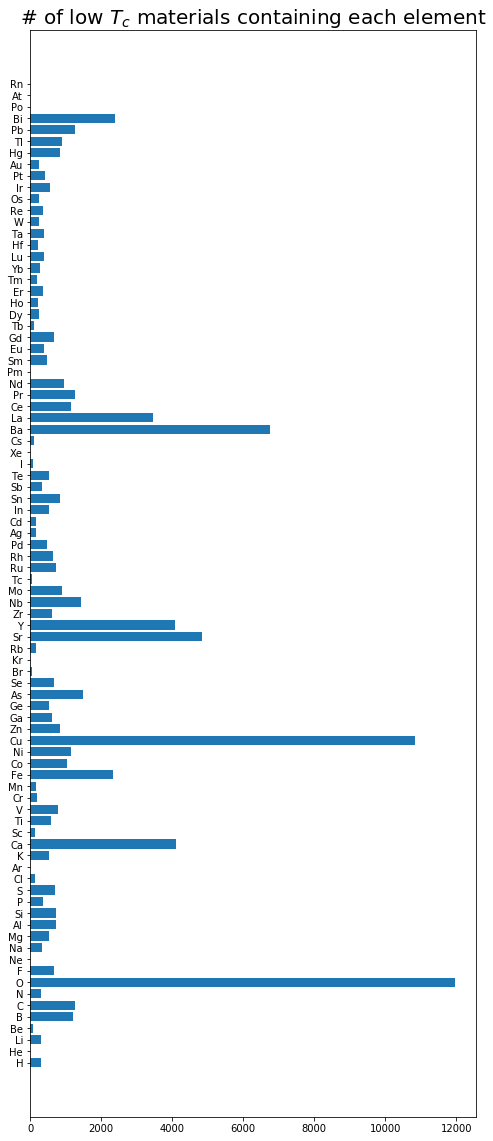

In [38]:
vis_data(unique_data,('Low Temp Materials','# of low $T_c$ materials containing each element'))

### Iron based super conductors

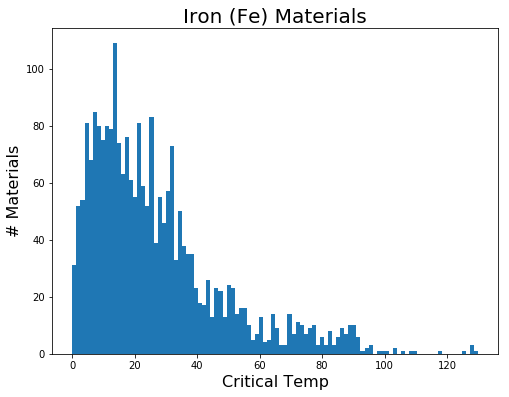

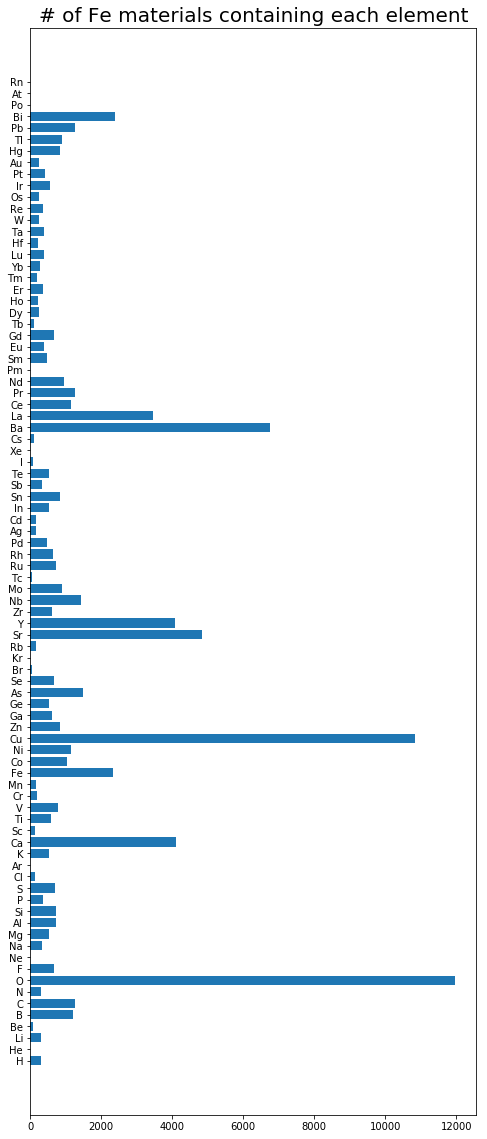

In [40]:
vis_data(fe_data,('Iron (Fe) Materials','# of Fe materials containing each element'))

### HTC superconductors

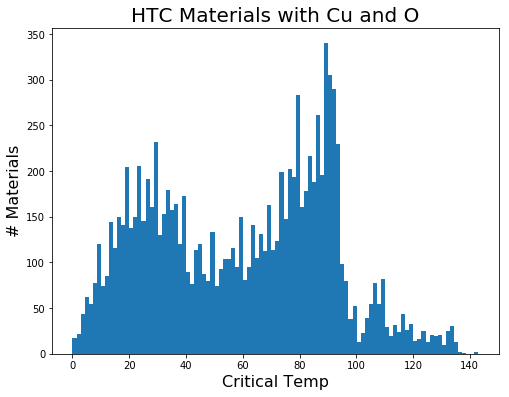

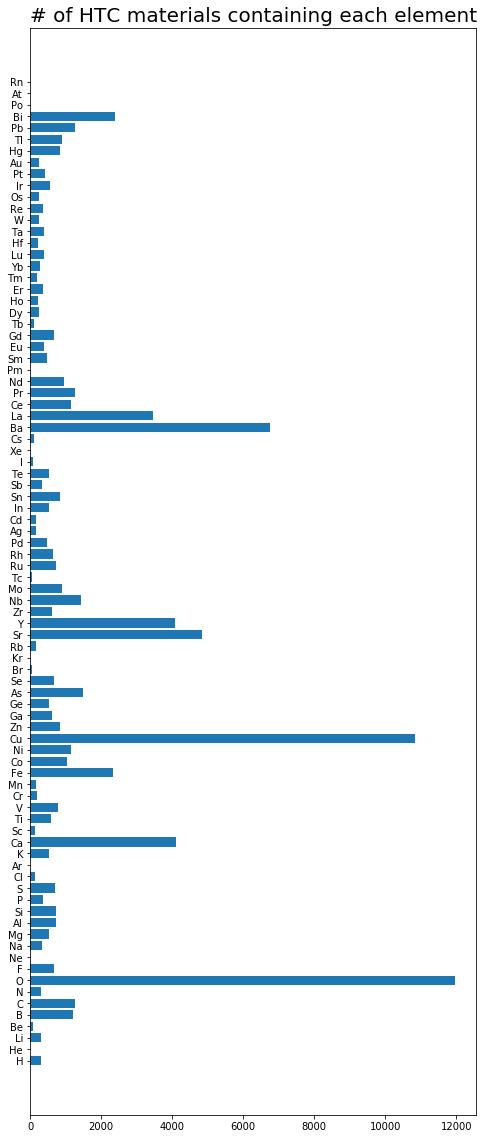

In [75]:
vis_data(htc_data,('HTC Materials with Cu and O','# of HTC materials containing each element'))

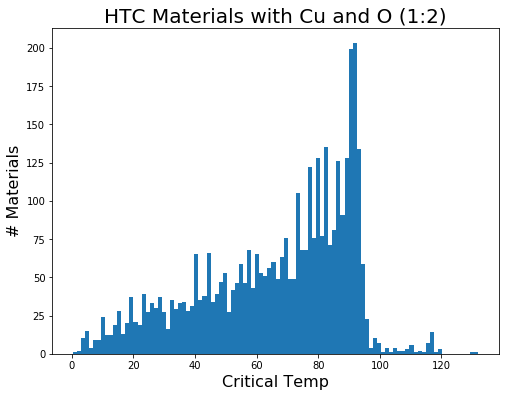

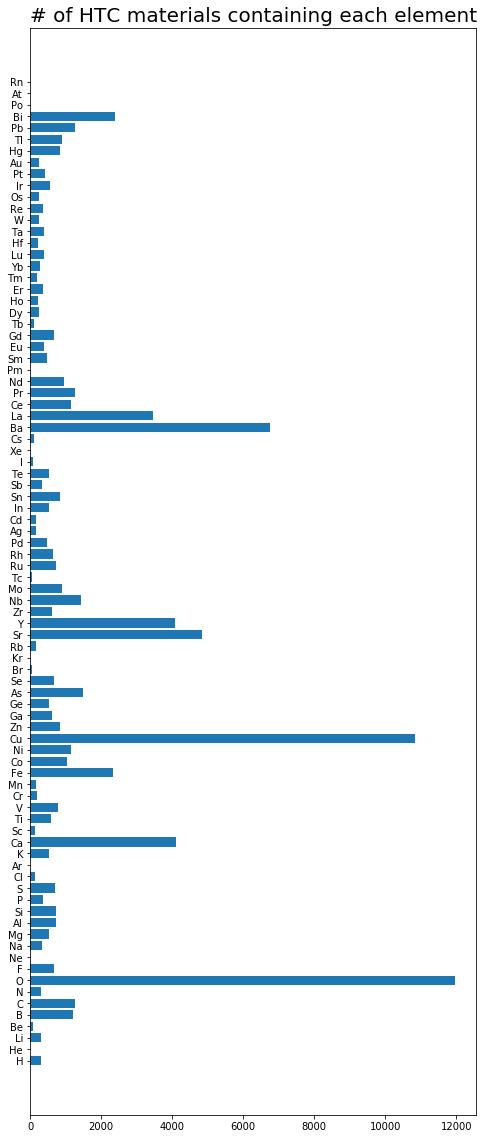

In [71]:
vis_data(htcr_data,('HTC Materials with Cu and O (1:2)','# of HTC materials containing each element'))

### Part 3 - Dimensionality reduction

Apply dimensionalty reduction (see project 3, for example principle component analysis (PCA)) to the dataset. What can you learn about the data? visualize your results.


### Implement PCA

In [115]:
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

def do_iso(x_data, y_data, n_components):
    iso = Isomap(n_components=2)
    projected = iso.fit_transform(x_data)
    plt.figure(figsize = (12,8))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=y_data, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.title('Isomap Reduction n='+str(n_components), fontsize=16)
    plt.xlabel('component 1', fontsize=16)
    plt.ylabel('component 2', fontsize=16)
    plt.colorbar();

def do_pca(x_data, y_data, n_components):
    pca = PCA(n_components = n_components)
    projected = pca.fit_transform(x_data)

    plt.figure(figsize = (12,8))
    plt.scatter(projected[:, 0], projected[:, 1],
                c=y_data, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))
    plt.title('PCA Reduction n='+str(n_components), fontsize=16)
    plt.xlabel('component 1', fontsize=16)
    plt.ylabel('component 2', fontsize=16)
    plt.colorbar();
    
    print('The  values represent the importance of each of the component axes in classifying the dataset:')
    print('explained variance: ', pca.explained_variance_)
    
    return pca


The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [63.97482781 38.046934  ]


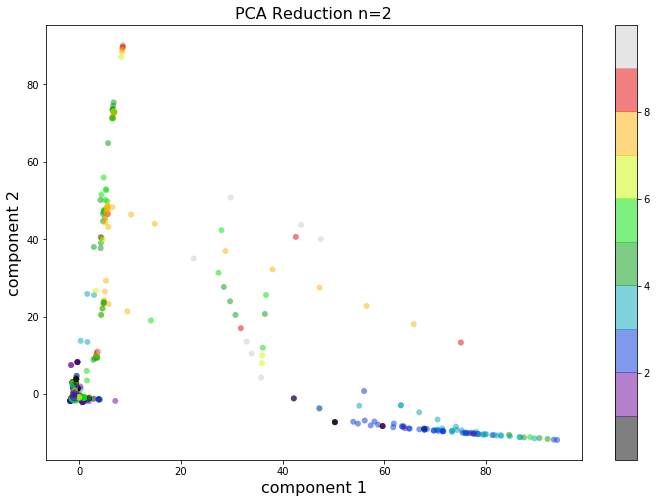

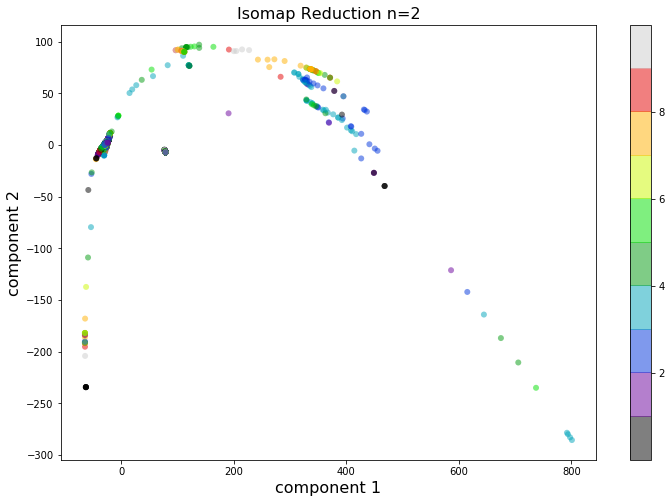

In [116]:
lowt_pca = do_pca(lowt_data[unique_x],lowt_data[unique_y],2)
lowt_iso = do_iso(lowt_data[unique_x],lowt_data[unique_y],2)
#fe_pca = do_pca2(lowt_data[unique_x],lowt_data[unique_y],3)

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [17.29132544 13.94467679]


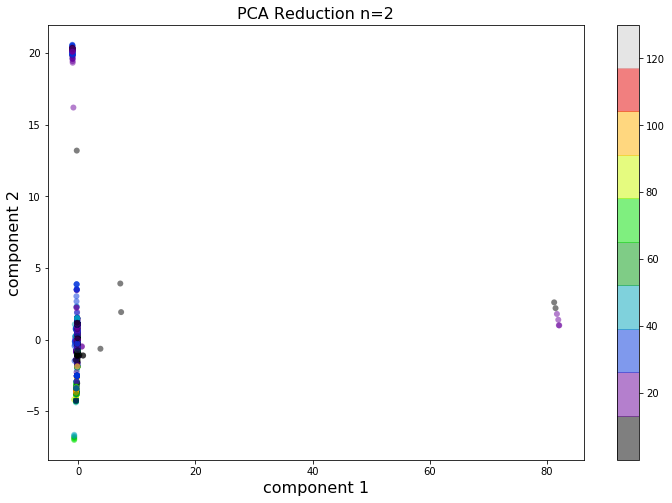

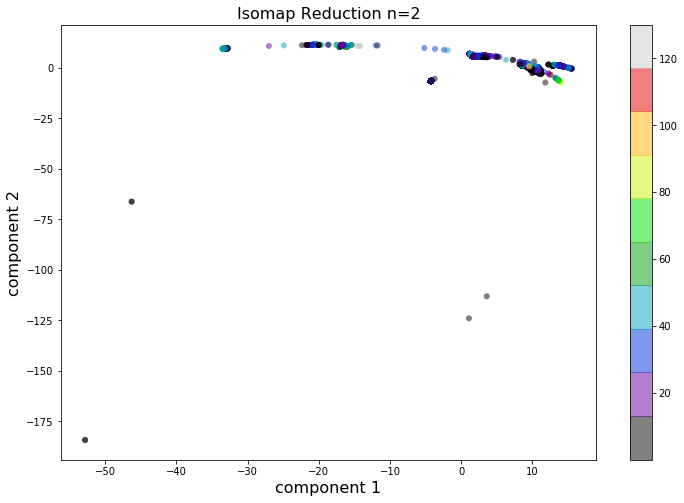

In [117]:
fe_pca = do_pca(fe_data[unique_x],fe_data[unique_y],2)
fe_iso = do_iso(fe_data[unique_x],fe_data[unique_y],2)

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [26.10036897 22.34819639]


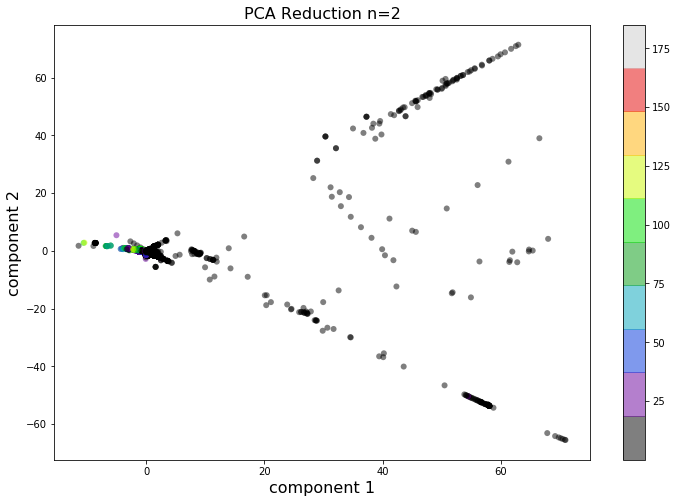

In [119]:
unique_pca = do_pca(unique_data[unique_x],unique_data[unique_y],2)

# Doing isomap reduction with whole dataset produces memory error.
#unique_iso = do_iso(unique_data[unique_x],unique_data[unique_y],2)

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [13.12141042  3.30043536]


MemoryError: 

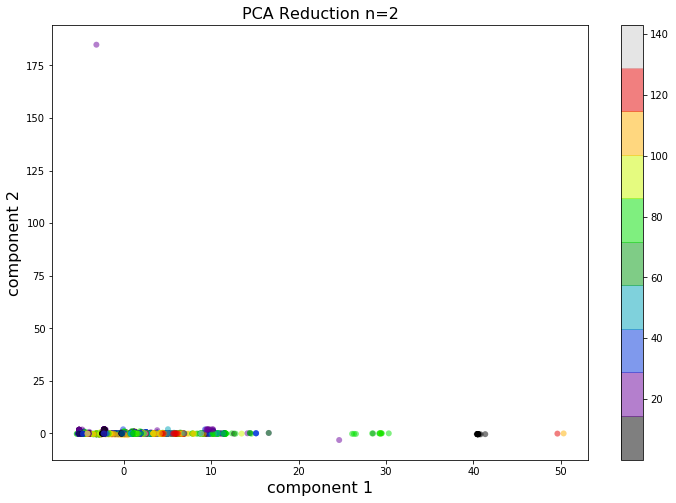

In [120]:
htc_pca = do_pca(htc_data[unique_x],htc_data[unique_y],2)
htc_iso = do_iso(htc_data[unique_x],htc_data[unique_y],2)

The  values represent the importance of each of the component axes in classifying the dataset:
explained variance:  [11.34381398  0.81993515]


MemoryError: 

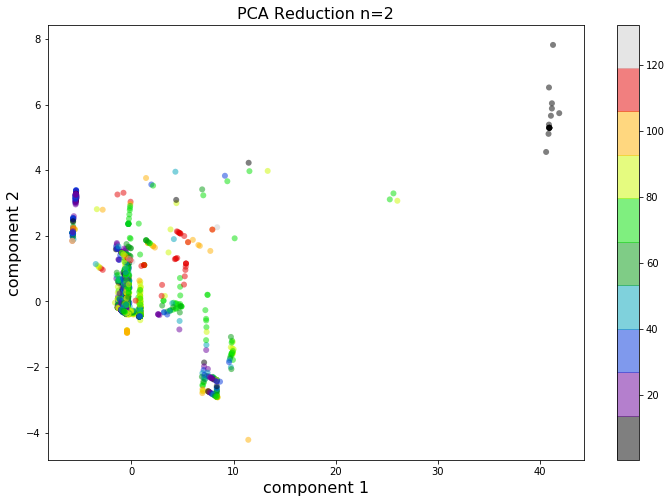

In [121]:
htcr_pca = do_pca(htcr_data[unique_x],htcr_data[unique_y],2)
htcr_iso = do_iso(htcr_data[unique_x],htcr_data[unique_y],2)

### Part 4 - Random Forests

Follow the example of the Stanev paper and apply Random Forest machine learning models to the data to predict the superconducting transition temperature. Use standard techniques discussed in class such as training and test data and cross-validation.

Consider both the entire dataset and the superconductor categories discussed in the Stanev paper (and listed in part 2) 
Discuss your models and use suitable graphs to document your work.

What predictions does your model make for the potential superconducting materials listed in table 6 of the Hamidieh paper? 


In [122]:
from sklearn.model_selection import train_test_split

# split data into training and test set for cross validation
def split(x_data,y_data):
    x_training, x_test, y_training, y_test = train_test_split(x_data, y_data)
    return x_training,y_training,x_test,y_test

# train and test (with cross validation) over n iterations and return the average score.
def rf_avgscore(train_data, n_iter):
    scores = []
    for i in range(n_iter):
        rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
        rfc.fit(train_data[0],train_data[1])
        scores.append(rfc.score(train_data[2],train_data[3]))
    return np.mean(scores)

# reduce dimensions of dataset
def reduce_dim(method, n_components, x_data):
    mth = method(n_components=n_components)
    return mth.fit_transform(x_data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
scores = []

train_data = split(x_data,y_data)
score = rf_avgscore(train_data, 50)
print('avg score: ', score)

scores.append(score)

### Part 5 - Other  machine learning models

Apply and discuss another machine learning model (discussed in class or in the textbook) to the data. How does it compare to random forests? Why does it perform better (or worse) than random forests?
